### Lomb-Scargle Fast
This class implements the fast, O[N logN] implementation of the Lomb-Scargle periodogram. It is much faster than either of the below methods, especially as the number of data points and frequencies increases. It is limited to either a simple pre-centered model or a floating mean model, and the frequencies must be computed on a regular grid.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gatspy.periodic import LombScargleFast
from gatspy import datasets, periodic
from astropy.timeseries import LombScargle

In [2]:
df = pd.read_excel(r'/Users/sophiechun/Desktop/Dr.Bans/Intro/J234919.0+664211.4_NEO+ALL.xlsx')
mjd = df['mjd'].values
w1mpro_ep = df['w1mpro_ep'].values

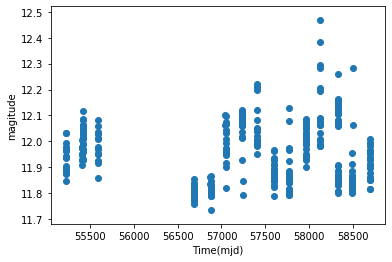

In [3]:
plt.scatter(mjd, w1mpro_ep)
plt.xlabel('Time(mjd)')
plt.ylabel('magitude')
plt.show()

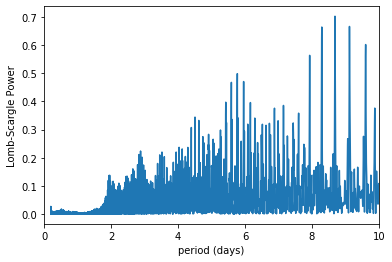

In [4]:
model = LombScargleFast().fit(mjd, w1mpro_ep)
periods, power = model.periodogram_auto(nyquist_factor=100)
fig, ax = plt.subplots()
ax.plot(periods, power)
ax.set(xlim=(0.0,10.0),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power');

In [5]:
# set range and find period
model.optimizer.period_range=(0.2, 30)
period = model.best_period
print("period = {0}".format(period))

Finding optimal frequency:
 - Estimated peak width = 0.00181
 - Using 5 steps per peak; omega_step = 0.000361
 - User-specified period range:  0.2 to 30
 - Computing periods at 86443 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
period = 8.689440908067683


In [10]:
ls = LombScargle(mjd, w1mpro_ep)
freq, power = ls.autopower()
ls.false_alarm_probability(power.max())

3.030824254429948e-82

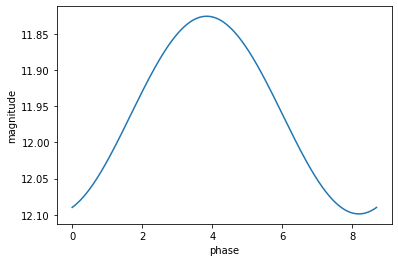

In [7]:
tfit = np.linspace(0, model.best_period, 1000)
yfit = model.predict(tfit)
plt.plot(tfit, yfit)
plt.gca().invert_yaxis()
plt.xlabel("phase")
plt.ylabel("magnitude")
plt.show()

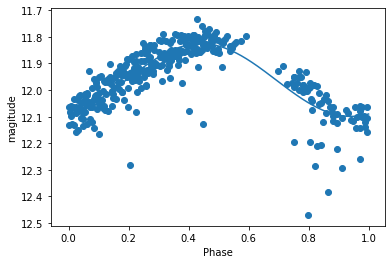

In [8]:
phase = (mjd / period) % 1
phase_fit = np.linspace(0, 1, 1000)
mag_fit = model.predict(period * phase_fit, period=period)

fig,ax = plt.subplots()
ax.plot(phase_fit, mag_fit)
ax.scatter(phase, w1mpro_ep)
ax.set(xlabel='Phase', ylabel='magitude')
ax.invert_yaxis();